In [7]:
import pandas as pd

# Read in track metadata with genre labels
tracks = pd.read_csv("fma-rock-vs-hiphop.csv")

# Read in track metrics with the features
echonest_metrics = pd.read_json("echonest-metrics.json",precise_float=True)


# Merge the relevant columns of tracks and echonest_metrics
echo_tracks = echonest_metrics.merge(tracks[['track_id','genre_top']],on='track_id')

# Inspect the resultant data
echo_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4802 entries, 0 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   acousticness      4802 non-null   float64
 2   danceability      4802 non-null   float64
 3   energy            4802 non-null   float64
 4   instrumentalness  4802 non-null   float64
 5   liveness          4802 non-null   float64
 6   speechiness       4802 non-null   float64
 7   tempo             4802 non-null   float64
 8   valence           4802 non-null   float64
 9   genre_top         4802 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 375.3+ KB


In [8]:
# Select only the numeric columns from echo_tracks
numeric_columns = echo_tracks.select_dtypes(include=['number'])

# Create a correlation matrix
corr_metrics = numeric_columns.corr()
corr_metrics.style.background_gradient()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1.000000,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070
acousticness,-0.372282,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841
danceability,0.049454,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603
instrumentalness,-0.275623,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967
liveness,0.048231,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093
speechiness,-0.026995,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894
tempo,-0.025392,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221
valence,0.010070,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000


In [36]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()

scaled_train_features= scaler.fit_transform(train_features)
scaled_test_features=scaler.transform(test_features)
from sklearn.model_selection import train_test_split
features=echo_tracks.drop(['genre_top','track_id'],axis=1).values
labels=echo_tracks['genre_top'].values
train_features,test_features,train_labels,test_labels=train_test_split(features,labels,random_state=10)

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_features, train_labels)

pred_labels_tree = tree.predict(test_features)

logreg = LogisticRegression(random_state=10, max_iter=1000)  
logreg.fit(train_features, train_labels)

pred_labels_logit = logreg.predict(test_features)

print("Decision Tree Classification Report:\n", classification_report(test_labels, pred_labels_tree))
print("\nLogistic Regression Classification Report:\n", classification_report(test_labels, pred_labels_logit))

Decision Tree Classification Report:
               precision    recall  f1-score   support

     Hip-Hop       0.66      0.68      0.67       235
        Rock       0.92      0.92      0.92       966

    accuracy                           0.87      1201
   macro avg       0.79      0.80      0.79      1201
weighted avg       0.87      0.87      0.87      1201


Logistic Regression Classification Report:
               precision    recall  f1-score   support

     Hip-Hop       0.81      0.57      0.67       235
        Rock       0.90      0.97      0.93       966

    accuracy                           0.89      1201
   macro avg       0.85      0.77      0.80      1201
weighted avg       0.88      0.89      0.88      1201



In [9]:
# Import train_test_split function and Decision tree classifier
from sklearn.model_selection import train_test_split

# Create features
features = echo_tracks.drop(['genre_top','track_id'], axis=1).values
print(features.shape)

# Create labels
labels = echo_tracks['genre_top'].values
print(labels.shape)

# Split our data
train_features, test_features, train_labels, test_labels = train_test_split(features,labels,random_state=10)


(4802, 8)
(4802,)


In [10]:
# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

# Scale the features and set the values to a new variable
scaler = StandardScaler()

# Scale train_features and test_features
scaled_train_features = scaler.fit_transform(train_features)
scaled_test_features = scaler.transform(test_features)

Text(0.5, 0, 'Principal Component #')

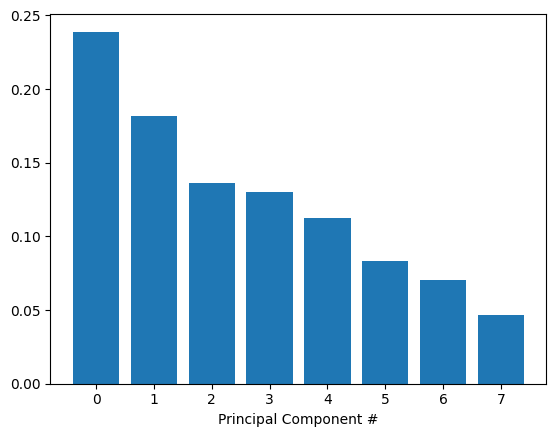

In [11]:
# This is just to make plots appear in the notebook
%matplotlib inline

# Import our plotting module, and PCA class
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Get our explained variance ratios from PCA using all features
pca = PCA()
pca.fit(scaled_train_features)
exp_variance = pca.explained_variance_ratio_

# plot the explained variance using a bar plot
fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), exp_variance)
ax.set_xlabel('Principal Component #')

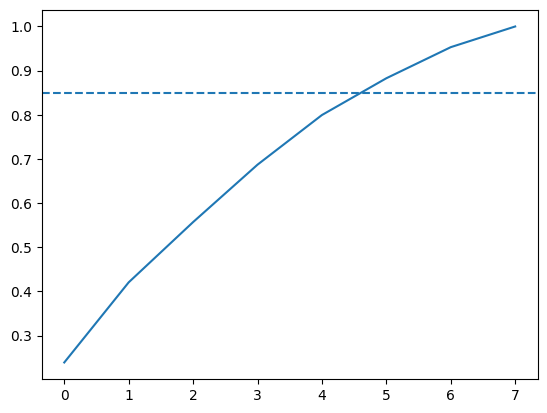

In [12]:
# Import numpy
import numpy as np

# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance)

# Plot the cumulative explained variance and draw a dashed line at 0.85.
fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.85, linestyle='--')

In [14]:
# Perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components=6)

# Fit and transform the scaled training features using pca
train_pca = pca.fit_transform(scaled_train_features)

# Fit and transform the scaled test features using pca
test_pca = pca.transform(scaled_test_features)

In [16]:
# Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Train our decision tree
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_pca,train_labels)

# Predict the labels for the test data
pred_labels_tree = tree.predict(test_pca)
print(pred_labels_tree)

['Rock' 'Rock' 'Rock' ... 'Hip-Hop' 'Rock' 'Rock']


In [17]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Train our logistic regression
logreg = LogisticRegression(random_state=10)
logreg.fit(train_pca,train_labels)
pred_labels_logit = logreg.predict(test_pca)

from sklearn.metrics import classification_report
class_rep_tree = classification_report(test_labels,pred_labels_tree)
class_rep_log = classification_report(test_labels,pred_labels_logit)

print("Decision Tree: \n", class_rep_tree)
print("Logistic Regression: \n", class_rep_log)

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.62      0.60      0.61       235
        Rock       0.90      0.91      0.91       966

    accuracy                           0.85      1201
   macro avg       0.76      0.76      0.76      1201
weighted avg       0.85      0.85      0.85      1201

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.77      0.54      0.64       235
        Rock       0.90      0.96      0.93       966

    accuracy                           0.88      1201
   macro avg       0.83      0.75      0.78      1201
weighted avg       0.87      0.88      0.87      1201



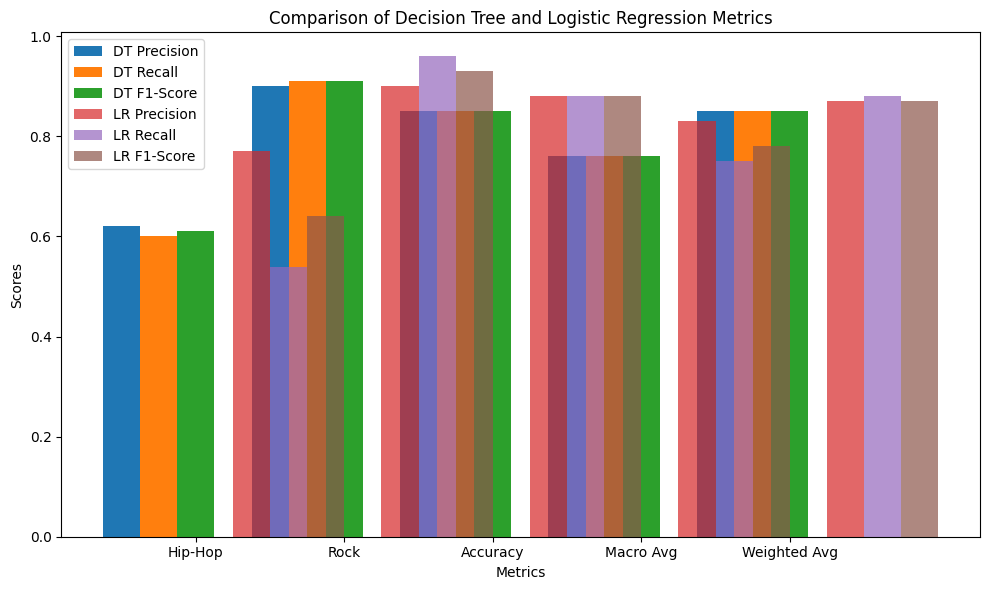

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Decision Tree
labels = ['Hip-Hop', 'Rock', 'Accuracy', 'Macro Avg', 'Weighted Avg']
precision_dt = [0.62, 0.90, 0.85, 0.76, 0.85]
recall_dt = [0.60, 0.91, 0.85, 0.76, 0.85]
f1_dt = [0.61, 0.91, 0.85, 0.76, 0.85]

# Data for Logistic Regression
precision_lr = [0.77, 0.90, 0.88, 0.83, 0.87]
recall_lr = [0.54, 0.96, 0.88, 0.75, 0.88]
f1_lr = [0.64, 0.93, 0.88, 0.78, 0.87]

# Set up bar width and positions
bar_width = 0.25
index = np.arange(len(labels))

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,6))

# Decision Tree bars
bar1 = ax.bar(index, precision_dt, bar_width, label='DT Precision')
bar2 = ax.bar(index + bar_width, recall_dt, bar_width, label='DT Recall')
bar3 = ax.bar(index + bar_width * 2, f1_dt, bar_width, label='DT F1-Score')

# Logistic Regression bars
bar4 = ax.bar(index + bar_width * 3.5, precision_lr, bar_width, label='LR Precision', alpha=0.7)
bar5 = ax.bar(index + bar_width * 4.5, recall_lr, bar_width, label='LR Recall', alpha=0.7)
bar6 = ax.bar(index + bar_width * 5.5, f1_lr, bar_width, label='LR F1-Score', alpha=0.7)

# Adding labels, title, and x-axis ticks
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Decision Tree and Logistic Regression Metrics')
ax.set_xticks(index + bar_width * 2)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()


In [22]:
#Subset a balanced proportion of data points
hop_only = echo_tracks.loc[echo_tracks['genre_top'] == 'Hip-Hop']
rock_only = echo_tracks.loc[echo_tracks['genre_top'] == 'Rock']

# subset only the rock songs, and take a sample the same size as there are hip-hop songs
rock_only = rock_only.sample(hop_only.shape[0], random_state=10)

# concatenate the dataframes hop_only and rock_only
rock_hop_bal = pd.concat([rock_only, hop_only])

# The features, labels, and pca projection are created for the balanced dataframe
features = rock_hop_bal.drop(['genre_top', 'track_id'], axis=1)
labels = rock_hop_bal['genre_top']

# Redefine the train and test set with the pca_projection from the balanced data
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, random_state=10)

train_pca = pca.fit_transform(scaler.fit_transform(train_features))
test_pca = pca.transform(scaler.transform(test_features))

In [20]:
# Train our decision tree on the balanced data
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_pca,train_labels)
pred_labels_tree = tree.predict(test_pca)

# Train our logistic regression on the balanced data
logreg = LogisticRegression()
logreg.fit(train_pca,train_labels)
pred_labels_logit = logreg.predict(test_pca)

# Compare the models
print("Decision Tree: \n", classification_report(test_labels,pred_labels_tree))
print("Logistic Regression: \n", classification_report(test_labels,pred_labels_logit))

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.82      0.77      0.79       230
        Rock       0.78      0.83      0.80       225

    accuracy                           0.80       455
   macro avg       0.80      0.80      0.80       455
weighted avg       0.80      0.80      0.80       455

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.84      0.80      0.82       230
        Rock       0.81      0.85      0.83       225

    accuracy                           0.82       455
   macro avg       0.82      0.82      0.82       455
weighted avg       0.83      0.82      0.82       455



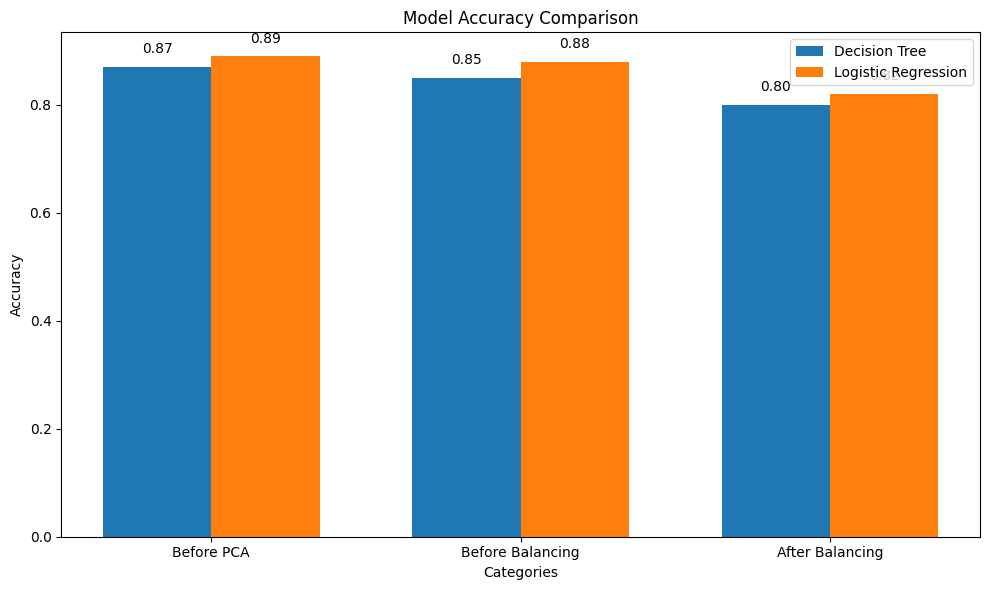

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Data for accuracy values
categories = ['Before PCA', 'Before Balancing', 'After Balancing']

# Accuracy values for Decision Tree
accuracy_dt = [0.87, 0.85, 0.80]

# Accuracy values for Logistic Regression
accuracy_lr = [0.89, 0.88, 0.82]

# Bar graph settings
bar_width = 0.35
index = np.arange(len(categories))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for Decision Tree and Logistic Regression
bars_dt = ax.bar(index - bar_width / 2, accuracy_dt, bar_width, label='Decision Tree', color='#1f77b4')
bars_lr = ax.bar(index + bar_width / 2, accuracy_lr, bar_width, label='Logistic Regression', color='#ff7f0e')

# Adding labels, title, and x-axis ticks
ax.set_xlabel('Categories')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison')
ax.set_xticks(index)
ax.set_xticklabels(categories)
ax.legend()

# Adding accuracy labels on bars
for bar in bars_dt:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        height + 0.02,  # Adjusted to display above the bar
        f'{height:.2f}', 
        ha='center', 
        va='bottom'
    )

for bar in bars_lr:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        height + 0.02,  # Adjusted to display above the bar
        f'{height:.2f}', 
        ha='center', 
        va='bottom'
    )

plt.tight_layout()
plt.show()
